<a href="https://colab.research.google.com/github/ruslanTankist/ml_works/blob/main/Hackathon/longevity_task_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аплоад датасетов

Ссылки на скачивание [train_longevity.csv](https://alexbmstu.github.io/2020/data/train_longevity.csv) и [test_longevity.csv](https://alexbmstu.github.io/2020/data/test_longevity.csv)

In [ ]:
from google.colab import files
files.upload()

Saving test_longevity.csv to test_longevity.csv
Saving train_longevity.csv to train_longevity.csv


{'test_longevity.csv': b'Id,Education,Sex,Age,Pet,Children,Region,Activity,MedExam,Sport,Longevity\n858,1,female,76,0,0,11,2655,+,,1\n859,3,male,73,0,3,26,1926,,+,1\n860,3,female,,0,0,26,723,,+,0\n861,3,female,75,2,0,35,1411,,,0\n862,2,female,73,1,0,28,1150,,,0\n863,1,male,76,0,0,17,2593,+,,1\n864,3,male,,8,2,23,6955,,,0\n865,2,female,73,0,0,23,1300,,,0\n866,2,male,75,0,0,23,1300,,,1\n867,2,male,73,1,0,21,1386,,+,1\n868,1,female,74,0,0,17,5050,+,,0\n869,3,female,,0,0,34,950,,,0\n870,3,female,71,1,1,34,1113,,,1\n871,3,female,73,0,0,34,790,,,0\n872,1,male,76,1,1,11,5255,+,,1\n873,1,female,74,0,0,69,500,+ + +,,0\n874,3,female,76,0,0,34,900,,,0\n875,2,male,74,1,0,33,2400,,+,1\n876,3,male,72,0,0,26,723,,+,1\n877,3,female,73,0,0,75,985,,,0\n878,3,female,72,0,0,34,790,,,0\n879,3,female,,0,0,34,790,,,0\n880,1,male,77,0,1,11,8316,+,+,1\n881,2,male,73,0,1,23,2600,,,1\n882,3,female,74,0,0,34,790,,,0\n883,3,male,73,0,0,75,1052,,,0\n884,2,female,74,0,0,34,1050,,,0\n885,3,female,73,0,0,39,705,,,0\n8

In [ ]:
!ls

sample_data  test_longevity.csv  train_longevity.csv


# Проход по практической части [методички](https://alexbmstu.github.io/2020)

## Импорт библиотек

In [ ]:
 # data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

 # visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Посмотрим на данные

In [ ]:
train_df = pd.read_csv('train_longevity.csv')
test_df = pd.read_csv('test_longevity.csv')
combine = [train_df, test_df]

In [ ]:
print(train_df.columns.values)
['Id' 'Longevity' 'Education' 'Sex' 'Age' 'Pet' 'Children' 'Region' 'Activity' 'MedExam' 'Sport']

['Id' 'Longevity' 'Education' 'Sex' 'Age' 'Pet' 'Children' 'Region'
 'Activity' 'MedExam' 'Sport']


['IdLongevityEducationSexAgePetChildrenRegionActivityMedExamSport']

In [ ]:
print(test_df.columns.values)
['Id' 'Education' 'Sex' 'Age' 'Activity' 'Sport' 'IsAlone' 'Age*Education']

['Id' 'Education' 'Sex' 'Age' 'Pet' 'Children' 'Region' 'Activity'
 'MedExam' 'Sport' 'Longevity']


['IdEducationSexAgeActivitySportIsAloneAge*Education']

In [ ]:
train_df.shape

(857, 11)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         857 non-null    int64 
 1   Longevity  857 non-null    int64 
 2   Education  857 non-null    int64 
 3   Sex        857 non-null    object
 4   Age        680 non-null    object
 5   Pet        857 non-null    int64 
 6   Children   857 non-null    int64 
 7   Region     857 non-null    object
 8   Activity   857 non-null    int64 
 9   MedExam    196 non-null    object
 10  Sport      236 non-null    object
dtypes: int64(6), object(5)
memory usage: 73.8+ KB


In [ ]:
train_df.head(3) 

,Id,Longevity,Education,Sex,Age,Pet,Children,Region,Activity,MedExam,Sport
0,1,0,3,female,73,1,0,21,725,NaN,NaN
1,2,1,1,male,75,1,0,17,7128,+,+
2,3,1,3,male,73,0,0,31,793,NaN,NaN


In [ ]:
train_df.describe()

,Id,Longevity,Education,Pet,Children,Activity
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,429.000000,0.383897,2.309218,0.525088,0.378063,3267.183197
std,247.538886,0.486617,0.836560,1.089302,0.793893,5048.489704
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,215.000000,0.000000,2.000000,0.000000,0.000000,793.000000
50%,429.000000,0.000000,3.000000,0.000000,0.000000,1446.000000
75%,643.000000,1.000000,3.000000,1.000000,0.000000,3128.000000
max,857.000000,1.000000,3.000000,8.000000,6.000000,51233.000000


In [ ]:
train_df.nunique()

Id           857
Longevity      2
Education      3
Sex            2
Age           12
Pet            7
Children       7
Region        51
Activity     229
MedExam        5
Sport          2
dtype: int64

## Описание задачи и данных


В нашем хакатоне мы будем использовать задачу анализа факторов активного долголетия. К долголетним будем относить пожилых людей, доживших до 90 лет и сохранивших физическую и социальную активность. Представленные в датасетах данные носят иммитационный характер, однако на реальных данных. Данные представляют информацию о пожилых людях в возрасте от 70 до 80 лет, для которых известен класс активного долголетия (зависимый параметр Longevity) в будущем (будет ли достигнут вораст 90 лет).


---


В датасетах приведена следующая информация о пожилых людях (атрибуты объекта):

Longevity - Класс активного долголетия: 1 - человек доживет до 90 лет; 0 - нет

Id - Идентификатор пожилого человека;

Education - Образование: 1 - высшее; 2 - среднее; 3 без образования;

Sex - Пол;

Age - Возраст;

Pet - Пожилой человек ухаживает за домашними животными: указано количество;

Children - Пожилой человек проживают с детьми/внуками/близкими родственниками: указано количество проживающих совместно в пожилым человеком;

Region - Регион проживания;

Activity - Уровень физической активности (количество шагов в день): данные получены от специального приложения;

MedExam - Посещение поликлиники (за послений год): кодирование посещений на основе заполненной медицинской карточки;

Sport - Физические упражнения: '+' пожилой человек занимается спортом (ходьба, бег, плаванье); '-' не занимается.

In [ ]:
feature_names = train_df.columns.tolist() 
for column in feature_names: 
    print (column) 
    print (train_df[column].value_counts(dropna=False))

Id
857    1
294    1
292    1
291    1
290    1
      ..
568    1
567    1
566    1
565    1
1      1
Name: Id, Length: 857, dtype: int64
Longevity
0    528
1    329
Name: Longevity, dtype: int64
Education
3    473
1    208
2    176
Name: Education, dtype: int64
Sex
female    557
male      300
Name: Sex, dtype: int64
Age
NaN       177
73        162
74        154
72         93
75         90
76         63
71         37
77         30
70         24
78         19
79          6
80          1
#ЗНАЧ!      1
Name: Age, dtype: int64
Pet
0    582
1    203
2     27
4     18
3     16
8      6
5      5
Name: Pet, dtype: int64
Children
0    652
1    114
2     78
5      4
4      4
3      4
6      1
Name: Children, dtype: int64
Region
34             131
11              85
17              74
31              69
26              60
36              46
23              43
24              32
35              29
37              26
33              24
21              23
29              18
13              17
19    

In [ ]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         857 non-null    int64 
 1   Longevity  857 non-null    int64 
 2   Education  857 non-null    int64 
 3   Sex        857 non-null    object
 4   Age        680 non-null    object
 5   Pet        857 non-null    int64 
 6   Children   857 non-null    int64 
 7   Region     857 non-null    object
 8   Activity   857 non-null    int64 
 9   MedExam    196 non-null    object
 10  Sport      236 non-null    object
dtypes: int64(6), object(5)
memory usage: 73.8+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         452 non-null    int64  
 1   Education  452 non-null    int64  
 2   Sex        452 non-null   

Анализ данных по сводным таблицам (pivot tables)

In [ ]:
train_df[['Education', 'Longevity']].groupby(['Education'], as_index=False).mean().sort_values(by='Longevity', ascending=False)

,Education,Longevity
0,1,0.625000
1,2,0.471591
2,3,0.245243


In [ ]:
train_df[['Sex', 'Longevity']].groupby(['Sex'], as_index=False).mean().sort_values(by='Longevity', ascending=False)

,Sex,Longevity
1,male,0.743333
0,female,0.190305


In [ ]:
train_df[['Pet', 'Longevity']].groupby(['Pet'], as_index=False).mean().sort_values(by='Longevity', ascending=False)

,Pet,Longevity
1,1,0.532020
2,2,0.481481
0,0,0.345361
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train_df[['Children', 'Longevity']].groupby(['Children'], as_index=False).mean().sort_values(by='Longevity', ascending=False)

,Children,Longevity
1,1,0.535088
2,2,0.512821
3,3,0.500000
0,0,0.345092
5,5,0.250000
4,4,0.000000
6,6,0.000000


Анализ данных путем визуализации

In [ ]:
# Заменим не числовые значения на средний возраст 
# (В методе есть другое решение, я его не увидел)
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')
train_df=train_df.fillna(int(train_df['Age'].mean(skipna=True)))

test_df['Age'] = pd.to_numeric(test_df['Age'], errors='coerce')
test_df=train_df.fillna(int(test_df['Age'].mean(skipna=True)))

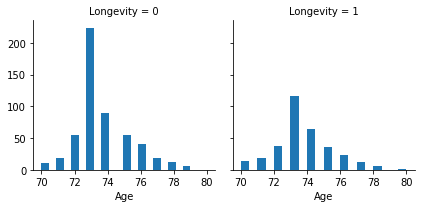

In [ ]:
g = sns.FacetGrid(train_df, col='Longevity')
g.map(plt.hist, 'Age', bins=20)

Корреляция категориальных и числовых признаков

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


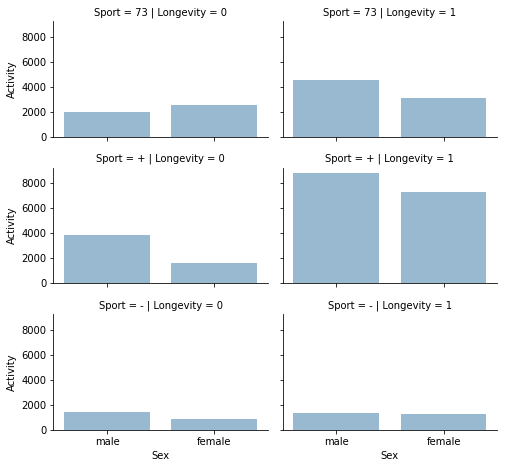

In [ ]:
grid = sns.FacetGrid(train_df, row='Sport', col='Longevity', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Activity', alpha=.5, ci=None)
grid.add_legend()

# Задание

1.   Признак Age должен быть дополнен и фильтрован для обработки алгоритмами.
2.   Признак MedExam может быть отброшен, поскольку является крайне неполным или содержит много нулевых значений как в обучающем, так и в тестовом наборе данных.
3.   Необходимо дополнить функцию Sport, поскольку она также может соотноситься с долголетием.
4.   Признак Region может быть исключен из нашего анализа, так как содержит большое количество дубликатов (22%) и может отсутствовать корреляция между ним и целевым признаком.
5.   Пизнак Id может быть удален из набора обучающих данных, поскольку он не способствует целевому признаку Longevity.
6.   Cоздать новый признак под названием Family (Семья на основе детей и домашних животных), чтобы получить общее количество членов семьи.
7.   Задать новый признак IsAlone, проживающих одиноко без домашних животных и родственников.
8.   Cоздать новый признак для возрастных групп (Age,Education), указывающий на социальный статус пожилого человека. Это превращает непрерывный числовой признак в порядковый категориальный признак.
9.   Cоздать новый признак диапазонов возрасного равновесия на основе признака Age, т.к. это поможет разделить пожилых людей на группы условно равновесного состояния (смертность повышается в определенные периоды времени между 70 и 80 годами, и в другие моменты резко снижается) для следующих интервалов: { (...,70](70,72],(72,74],(74,76],(76,78],(80,..)}



---



1. Выполнено ранее в [этой](https://colab.research.google.com/drive/1I0-UQ8_FSPYrERv1EvydVXNo7-gZsSen#scrollTo=Q3S-f-DFhG_o&line=2&uniqifier=1)  ячейке

2. Удалим столбец MedExam

In [ ]:
train_df.drop('MedExam', axis = 1, inplace = True)

In [ ]:
test_df.drop('MedExam', axis = 1, inplace = True)

3. Дополним признак Sport

In [ ]:
train_df['Sport'] = train_df['Sport'].map( {'+': 1, '-': 0})

In [ ]:
train_df.fillna(0, inplace=True)

In [ ]:
test_df['Sport'] = test_df['Sport'].map( {'+': 1, '-': 0})
test_df.fillna(0, inplace=True)

4. Исключим Region из train_df

In [ ]:
train_df.drop('Region', axis = 1, inplace = True)

In [ ]:
test_df.drop('Region', axis = 1, inplace = True)

5. Исключим Id из train_df

In [ ]:
train_df.drop('Id', axis = 1, inplace = True)

In [ ]:
test_df.drop('Id', axis = 1, inplace = True)

6. Добавим признак Family (сумма детей и домашних животных)

In [ ]:
family = train_df['Children'] + train_df['Pet']

In [ ]:
train_df['Family'] = family

In [ ]:
train_df.head(3)

,Longevity,Education,Sex,Age,Pet,Children,Activity,Sport,Family
0,0,3,female,73.0,1,0,725,0.0,1
1,1,1,male,75.0,1,0,7128,1.0,1
2,1,3,male,73.0,0,0,793,0.0,0


In [ ]:
family_test = test_df['Children'] + test_df['Pet']
test_df['Family'] = family_test

7. Добавим признак IsAlone

In [ ]:
isAlone = train_df['Family'].map({0: 1}).fillna(0)

In [ ]:
train_df['IsAlone'] = isAlone

In [ ]:
train_df.head(3)

,Longevity,Education,Sex,Age,Pet,Children,Activity,Sport,Family,IsAlone
0,0,3,female,73.0,1,0,725,0.0,1,0.0
1,1,1,male,75.0,1,0,7128,1.0,1,0.0
2,1,3,male,73.0,0,0,793,0.0,0,1.0


In [ ]:
isAlone_test = test_df['Family'].map({0: 1}).fillna(0)
test_df['IsAlone'] = isAlone_test

8. Добавим порядковый категориальный признак SocStatus для возрастных групп на основе Age и Education

У образования три категории: 1, 2 и 3

Пусть SocStatus = Age * Education, не нормализуя возраст, поскольку разница социального статуса между 73-х и 74-хлетним не велика

In [ ]:
socStatus = train_df['Age']*train_df['Education']

In [ ]:
train_df['SocStatus'] = socStatus

In [ ]:
dic = {range(70, 100): 0, range(100, 130): 1, range(130, 160): 2, range(160, 190): 3, range(190, 220): 4, range(220, 250): 5}
socStatus = train_df['SocStatus'].apply(lambda x: next((v for k, v in dic.items() if x in k), 0))

In [ ]:
train_df['SocStatus'] = socStatus

In [ ]:
train_df.head(3)

,Longevity,Education,Sex,Age,Pet,Children,Activity,Sport,Family,IsAlone,SocStatus
0,0,3,female,73.0,1,0,725,0.0,1,0.0,4
1,1,1,male,75.0,1,0,7128,1.0,1,0.0,0
2,1,3,male,73.0,0,0,793,0.0,0,1.0,4


In [ ]:
socStatus_test = test_df['Age']*test_df['Education']
test_df['SocStatus'] = socStatus_test
socStatus_test = test_df['SocStatus'].apply(lambda x: next((v for k, v in dic.items() if x in k), 0))
test_df['SocStatus'] = socStatus_test

9. Добавим признак диапазонов возрастного равновесия AgeD на основе признака Age

In [ ]:
dic = {range(70, 72): 0, range(72, 74): 1, range(74, 76): 2, range(76, 78): 3, range(78, 80): 4}

ageD = train_df['Age'].apply(lambda x: next((v for k, v in dic.items() if x in k), 0))

train_df['AgeD'] = ageD

In [ ]:
train_df.head(3)

,Longevity,Education,Sex,Age,Pet,Children,Activity,Sport,Family,IsAlone,SocStatus,AgeD
0,0,3,female,73.0,1,0,725,0.0,1,0.0,4,1
1,1,1,male,75.0,1,0,7128,1.0,1,0.0,0,2
2,1,3,male,73.0,0,0,793,0.0,0,1.0,4,1


In [ ]:
ageD_test = test_df['Age'].apply(lambda x: next((v for k, v in dic.items() if x in k), 0))

test_df['AgeD'] = ageD_test